In [6]:
!pipx install torch torchvision torchaudio r cpu version
!pipx install transformers
!pipx install scikit-learn
!pipx install pandas
!pipx install matplotlib seaborn


'torch' already seems to be installed. Not modifying existing installation in
'/Users/ledjahalltari/.local/pipx/venvs/torch'. Pass '--force' to force
installation.
'torchvision' already seems to be installed. Not modifying existing
installation in '/Users/ledjahalltari/.local/pipx/venvs/torchvision'. Pass
'--force' to force installation.
⣻ installing torchaudioronmentNote: Dependent package 'torch' contains 2 apps
  - torchfrtrace
  - torchrun
Note: Dependent package 'sympy' contains 1 apps
  - isympy

No apps associated with package torchaudio. Try again with '--include-deps' to
include apps of dependent packages, which are listed above. If you are
attempting to install a library, pipx should not be used. Consider using pip
or a similar tool instead.
'transformers' already seems to be installed. Not modifying existing
installation in '/Users/ledjahalltari/.local/pipx/venvs/transformers'. Pass
'--force' to force installation.
'scikit-learn' already seems to be installed. Not modifying 

Note: you may need to restart the kernel to use updated packages.
Total samples: 44898
True news: 21417
Fake news: 23481

Data shape: (44898, 5)

Missing values:
title      0
text       0
subject    0
date       0
label      0
dtype: int64

First few rows:
                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...    

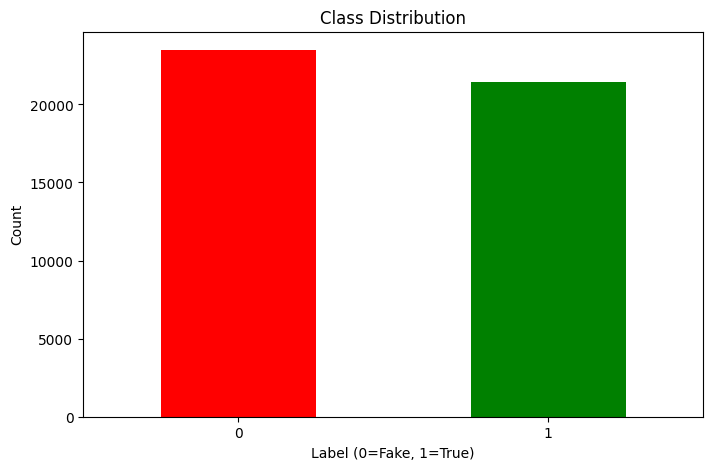

Training set size: 35918
Test set size: 8980
TF-IDF matrix shape (train): (35918, 5000)
TF-IDF matrix shape (test): (8980, 5000)
MODEL 1: LOGISTIC REGRESSION

Cross-validation F1 scores: [0.98701678 0.98706207 0.98790969 0.98470948 0.98865949]
Mean CV F1 score: 0.9871 (+/- 0.0027)

Test Accuracy: 0.9906
Test F1 Score: 0.9902

Classification Report:
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      4696
        True       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



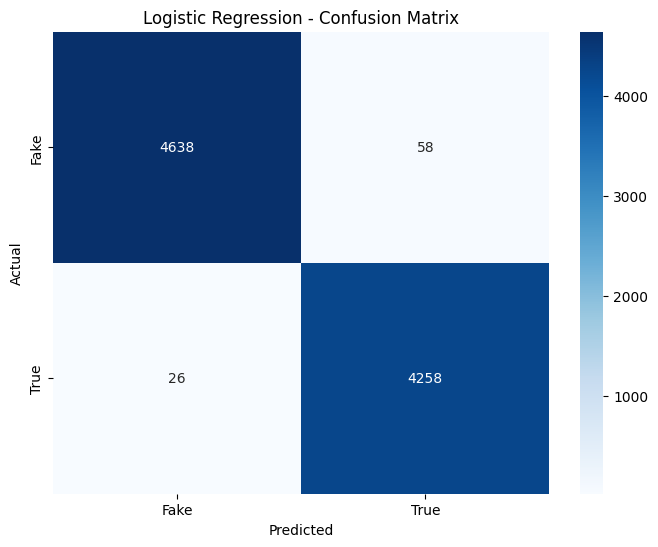

MODEL 2: NAIVE BAYES

Cross-validation F1 scores: [0.944007   0.93843448 0.94335766 0.93809454 0.9399592 ]
Mean CV F1 score: 0.9408 (+/- 0.0049)

Test Accuracy: 0.9425
Test F1 Score: 0.9399

Classification Report:
              precision    recall  f1-score   support

        Fake       0.95      0.94      0.94      4696
        True       0.94      0.94      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



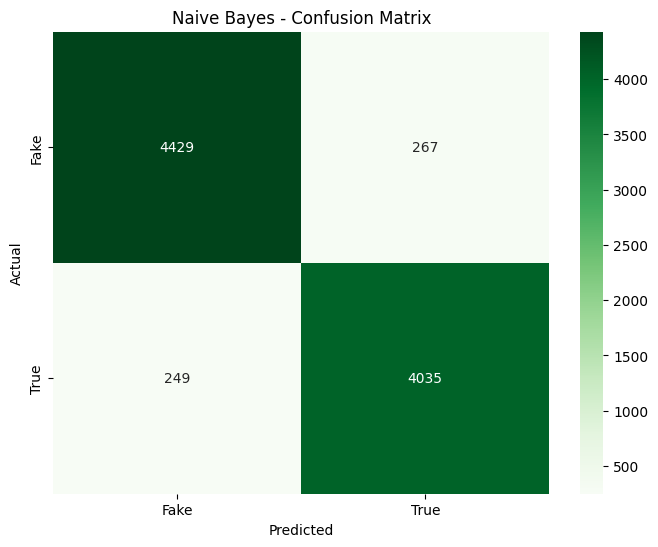

MODEL 3: RANDOM FOREST

Cross-validation F1 scores: [0.99824818 0.99708455 0.99693744 0.99795918 0.9976656 ]
Mean CV F1 score: 0.9976 (+/- 0.0010)

Test Accuracy: 0.9976
Test F1 Score: 0.9974

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4696
        True       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



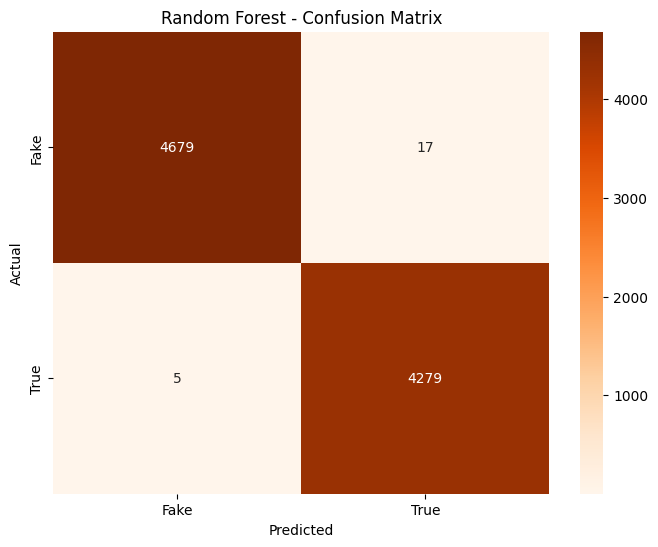

MODEL 4: SUPPORT VECTOR MACHINE

Cross-validation F1 scores: [0.99402245 0.99344883 0.99519581 0.99402245 0.99357852]
Mean CV F1 score: 0.9941 (+/- 0.0012)

Test Accuracy: 0.9942
Test F1 Score: 0.9939

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      4696
        True       0.99      1.00      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



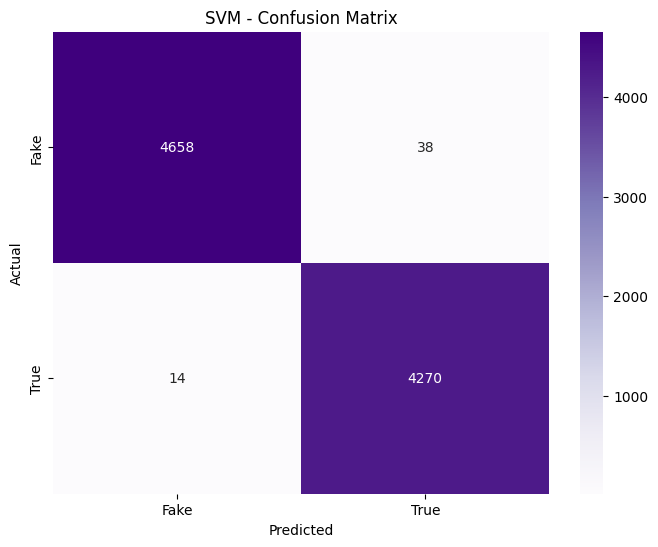

MODEL COMPARISON

Model Performance Summary:
              Model  Accuracy  F1 Score
      Random Forest  0.997550  0.997436
                SVM  0.994209  0.993948
Logistic Regression  0.990646  0.990233
        Naive Bayes  0.942539  0.939902


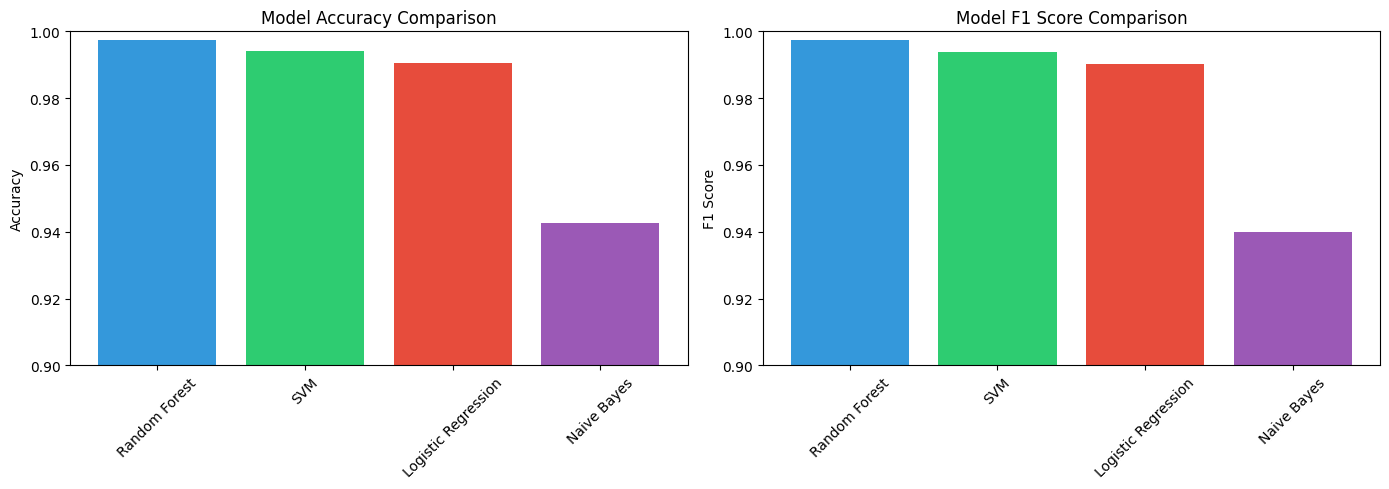

TOP FEATURES (Logistic Regression)

Top 20 features for FAKE news:
video: -9.4007
just: -6.6444
hillary: -6.0469
president trump: -5.9713
gop: -5.9046
read: -5.8269
image: -5.7970
featured image: -5.6563
featured: -5.5811
watch: -4.7742
obama: -4.6800
america: -4.5147
mr: -4.4461
com: -4.3880
getty: -4.0974
getty images: -3.9739
breaking: -3.9395
president obama: -3.8584
like: -3.7553
isis: -3.7046

Top 20 features for TRUE news:
reuters: 24.1469
washington reuters: 9.7033
president donald: 5.7609
wednesday: 5.3972
republican: 5.2567
reuters president: 4.9033
washington: 4.8921
tuesday: 4.8532
thursday: 4.7632
friday: 4.1769
nov: 4.0084
said statement: 3.9381
monday: 3.8843
spokesman: 3.4949
trump said: 3.4542
president barack: 3.3101
comment: 3.3028
minister: 3.2689
presidential: 3.2672
told reuters: 3.1942

Best model (Random Forest) and vectorizer saved!
Files saved: 'best_fake_news_classifier.pkl' and 'tfidf_vectorizer.pkl'
Model and vectorizer loaded successfully!
Model type: <cla

In [3]:
# Cell 1: Install required packages
%pip install numpy pandas matplotlib seaborn scikit-learn nltk

# Cell 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Cell 3: Load and explore data
# Load the datasets
true_data = pd.read_csv('News_dataset/True.csv')
fake_data = pd.read_csv('News_dataset/Fake.csv')

# Add labels
true_data['label'] = 1  # 1 for true news
fake_data['label'] = 0  # 0 for fake news

# Combine datasets
data = pd.concat([true_data, fake_data], ignore_index=True)

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display basic info
print(f"Total samples: {len(data)}")
print(f"True news: {data['label'].sum()}")
print(f"Fake news: {len(data) - data['label'].sum()}")
print(f"\nData shape: {data.shape}")
print(f"\nMissing values:\n{data.isnull().sum()}")
print(f"\nFirst few rows:")
print(data.head())

# Cell 4: Data preprocessing
# Combine title and text for better features
data['combined_text'] = data['title'] + ' ' + data['text']

# Check for any missing values in text
print(f"Missing values in combined_text: {data['combined_text'].isnull().sum()}")

# Remove any rows with missing text
data = data.dropna(subset=['combined_text'])

# Display class distribution
plt.figure(figsize=(8, 5))
data['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Distribution')
plt.xlabel('Label (0=Fake, 1=True)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Cell 5: Feature extraction with TF-IDF
# Split data
X = data['combined_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit features to top 5000
    stop_words='english',
    ngram_range=(1, 2),  # Use unigrams and bigrams
    max_df=0.7,  # Ignore terms that appear in more than 70% of documents
    min_df=5  # Ignore terms that appear in less than 5 documents
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")

# Cell 6: Model 1 - Logistic Regression
print("=" * 50)
print("MODEL 1: LOGISTIC REGRESSION")
print("=" * 50)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_tfidf, y_train, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Fake', 'True']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cell 7: Model 2 - Naive Bayes
print("=" * 50)
print("MODEL 2: NAIVE BAYES")
print("=" * 50)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Cross-validation
cv_scores = cross_val_score(nb_model, X_train_tfidf, y_train, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Fake', 'True']))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Naive Bayes - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cell 8: Model 3 - Random Forest
print("=" * 50)
print("MODEL 3: RANDOM FOREST")
print("=" * 50)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)

# Cross-validation
cv_scores = cross_val_score(rf_model, X_train_tfidf, y_train, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Fake', 'True']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cell 9: Model 4 - Support Vector Machine (SVM)
print("=" * 50)
print("MODEL 4: SUPPORT VECTOR MACHINE")
print("=" * 50)

svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Cross-validation
cv_scores = cross_val_score(svm_model, X_train_tfidf, y_train, cv=5, scoring='f1')
print(f"\nCross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Fake', 'True']))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('SVM - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Cell 10: Model Comparison
print("=" * 50)
print("MODEL COMPARISON")
print("=" * 50)

models = {
    'Logistic Regression': (lr_model, y_pred_lr),
    'Naive Bayes': (nb_model, y_pred_nb),
    'Random Forest': (rf_model, y_pred_rf),
    'SVM': (svm_model, y_pred_svm)
}

results = []
for name, (model, y_pred) in models.items():
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1 Score', ascending=False)

print("\nModel Performance Summary:")
print(results_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].bar(results_df['Model'], results_df['Accuracy'], color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.9, 1.0])
axes[0].tick_params(axis='x', rotation=45)

# F1 Score comparison
axes[1].bar(results_df['Model'], results_df['F1 Score'], color=['#3498db', '#2ecc71', '#e74c3c', '#9b59b6'])
axes[1].set_title('Model F1 Score Comparison')
axes[1].set_ylabel('F1 Score')
axes[1].set_ylim([0.9, 1.0])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Cell 11: Feature importance (for Logistic Regression)
print("=" * 50)
print("TOP FEATURES (Logistic Regression)")
print("=" * 50)

feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_[0]

# Get top features for fake news (negative coefficients)
fake_indices = np.argsort(coefficients)[:20]
print("\nTop 20 features for FAKE news:")
for idx in fake_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

# Get top features for true news (positive coefficients)
true_indices = np.argsort(coefficients)[-20:][::-1]
print("\nTop 20 features for TRUE news:")
for idx in true_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

# Cell 12: Save the best model
import joblib

# Save the best model (highest F1 score)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name][0]

joblib.dump(best_model, 'best_fake_news_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print(f"\nBest model ({best_model_name}) and vectorizer saved!")
print(f"Files saved: 'best_fake_news_classifier.pkl' and 'tfidf_vectorizer.pkl'")

# Cell 13: Load saved model and create prediction function
import joblib

# Load the saved model and vectorizer
loaded_model = joblib.load('best_fake_news_classifier.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print("Model and vectorizer loaded successfully!")
print(f"Model type: {type(loaded_model)}")

def predict_news(text, model=None, vectorizer=None):
    """
    Predict if a news article is fake or true
    
    Parameters:
    text: str - The news text to classify
    model: trained model (default: loaded_model)
    vectorizer: trained TF-IDF vectorizer (default: loaded_vectorizer)
    
    Returns:
    label: str - 'Fake' or 'True'
    confidence: float - Confidence score
    probability: array - Full probability array [Fake_prob, True_prob]
    """
    if model is None:
        model = loaded_model
    if vectorizer is None:
        vectorizer = loaded_vectorizer
    
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)[0]
    probability = model.predict_proba(text_tfidf)[0]
    
    label = 'True' if prediction == 1 else 'Fake'
    confidence = probability[prediction] * 100
    
    return label, confidence, probability

# Test with example
example_text = "Breaking news: Scientists discover new planet in our solar system."
prediction, confidence, probs = predict_news(example_text)
print(f"\nExample Prediction:")
print(f"Text: {example_text}")
print(f"Prediction: {prediction}")
print(f"Confidence: {confidence:.2f}%")
print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")

# Cell 14: Diagnostic analysis and testing
print("=" * 70)
print("TRAINING DATA ANALYSIS")
print("=" * 70)
print(f"\nTrue news samples: {len(true_data)}")
print(f"Fake news samples: {len(fake_data)}")
print(f"\nAverage True news length: {true_data['text'].str.len().mean():.0f} characters")
print(f"Average Fake news length: {fake_data['text'].str.len().mean():.0f} characters")
print(f"\nAverage True news word count: {true_data['text'].str.split().str.len().mean():.0f} words")
print(f"Average Fake news word count: {fake_data['text'].str.split().str.len().mean():.0f} words")

# Test with actual dataset samples
print("\n" + "=" * 70)
print("TESTING WITH ACTUAL DATASET SAMPLES")
print("=" * 70)

# Get a real true news sample
true_sample = true_data.sample(1, random_state=42)
true_text = true_sample['text'].iloc[0]
prediction, confidence, probs = predict_news(true_text)
print(f"\nReal TRUE News Sample:")
print(f"Text length: {len(true_text)} characters")
print(f"Text preview: {true_text[:150]}...")
print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")
print(f"Actual: True | Match: {'✓ CORRECT' if prediction == 'True' else '✗ WRONG'}")

# Get a real fake news sample
fake_sample = fake_data.sample(1, random_state=42)
fake_text = fake_sample['text'].iloc[0]
prediction, confidence, probs = predict_news(fake_text)
print(f"\nReal FAKE News Sample:")
print(f"Text length: {len(fake_text)} characters")
print(f"Text preview: {fake_text[:150]}...")
print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")
print(f"Actual: Fake | Match: {'✓ CORRECT' if prediction == 'Fake' else '✗ WRONG'}")

# Test with longer versions of examples
print("\n" + "=" * 70)
print("TESTING WITH LONGER TEXT SAMPLES")
print("=" * 70)

longer_examples = [
    "The president announced a new policy today that will affect millions of citizens. The policy focuses on healthcare reform and will be implemented over the next two years. Experts say this could significantly impact the economy and improve access to medical services for low-income families. The announcement came after months of deliberation and consultation with various stakeholders.",
    "Researchers at MIT have developed a new AI system that can detect cancer early. The system uses machine learning algorithms to analyze medical images and has shown promising results in clinical trials. The technology could revolutionize cancer diagnosis and save thousands of lives each year. The research team published their findings in a peer-reviewed journal last month."
]

for i, text in enumerate(longer_examples, 1):
    prediction, confidence, probs = predict_news(text)
    print(f"\nExample {i} (Length: {len(text)} chars):")
    print(f"Text: {text[:100]}...")
    print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
    print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")

# Test on original test set to verify model performance
print("\n" + "=" * 70)
print("TESTING ON ORIGINAL TEST SET")
print("=" * 70)

# Reload and split data
data_test = pd.concat([
    pd.read_csv('News_dataset/True.csv').assign(label=1),
    pd.read_csv('News_dataset/Fake.csv').assign(label=0)
]).reset_index(drop=True)

X_test_data = data_test['text']
y_test_data = data_test['label']
_, X_test_orig, _, y_test_orig = train_test_split(X_test_data, y_test_data, test_size=0.2, random_state=42, stratify=y_test_data)

# Test predictions
X_test_tfidf_orig = loaded_vectorizer.transform(X_test_orig)
predictions_orig = loaded_model.predict(X_test_tfidf_orig)

print(f"\nAccuracy on test set: {accuracy_score(y_test_orig, predictions_orig):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_orig, predictions_orig, target_names=['Fake', 'True']))

# Cell 15: Batch prediction function
def predict_batch(texts, model=None, vectorizer=None):
    """
    Predict on multiple texts at once
    
    Parameters:
    texts: list of strings - Multiple news articles
    
    Returns:
    results: DataFrame with predictions and confidence scores
    """
    if model is None:
        model = loaded_model
    if vectorizer is None:
        vectorizer = loaded_vectorizer
    
    # Transform all texts
    texts_tfidf = vectorizer.transform(texts)
    
    # Make predictions
    predictions = model.predict(texts_tfidf)
    probabilities = model.predict_proba(texts_tfidf)
    
    # Create results dataframe
    results = pd.DataFrame({
        'Text': texts,
        'Prediction': ['True' if p == 1 else 'Fake' for p in predictions],
        'Confidence': [prob[p] * 100 for p, prob in zip(predictions, probabilities)],
        'Fake_Probability': [prob[0] * 100 for prob in probabilities],
        'True_Probability': [prob[1] * 100 for prob in probabilities]
    })
    
    return results

# Example usage
articles = [
    "The stock market reached a new high today.",
    "Scientists have discovered a cure for all diseases!",
    "The weather forecast predicts rain for tomorrow."
]

results_df = predict_batch(articles)
print("\nBatch Prediction Results:")
print(results_df)

In [5]:
# Cell 1: Load the saved model and vectorizer
import joblib
import pandas as pd

# Load the saved model and vectorizer
loaded_model = joblib.load('best_fake_news_classifier.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print("Model and vectorizer loaded successfully!")
print(f"Model type: {type(loaded_model)}")

# Cell 2: Function to predict on new text
def predict_news(text, model=loaded_model, vectorizer=loaded_vectorizer):
    """
    Predict if a news article is fake or true
    
    Parameters:
    text: str - The news text to classify
    
    Returns:
    prediction: str - 'Fake' or 'True'
    probability: float - Confidence score
    """
    # Transform text using the saved vectorizer
    text_tfidf = vectorizer.transform([text])
    
    # Make prediction
    prediction = model.predict(text_tfidf)[0]
    probability = model.predict_proba(text_tfidf)[0]
    
    # Convert to readable format
    label = 'True' if prediction == 1 else 'Fake'
    confidence = probability[prediction] * 100
    
    return label, confidence, probability

# Test the function
example_text = "Breaking news: Scientists discover new planet in our solar system."
prediction, confidence, probs = predict_news(example_text)

print(f"Text: {example_text}")
print(f"Prediction: {prediction}")
print(f"Confidence: {confidence:.2f}%")
print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")

# Cell 3: Test on multiple examples
test_articles = [
    "The president announced a new policy today that will affect millions of citizens.",
    "Aliens have landed in New York and are taking over the city!",
    "Researchers at MIT have developed a new AI system that can detect cancer early.",
    "Breaking: The moon is made of cheese and NASA has been hiding it for years!"
]

print("=" * 70)
print("TESTING MODEL ON MULTIPLE ARTICLES")
print("=" * 70)

for i, article in enumerate(test_articles, 1):
    prediction, confidence, probs = predict_news(article)
    print(f"\nArticle {i}:")
    print(f"Text: {article[:80]}...")
    print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
    print(f"Probabilities - Fake: {probs[0]*100:.2f}%, True: {probs[1]*100:.2f}%")
    print("-" * 70)

    # Cell 4: Test on data from the dataset (optional)
# Load a sample from your dataset to test
true_sample = pd.read_csv('News_dataset/True.csv').sample(1)
fake_sample = pd.read_csv('News_dataset/Fake.csv').sample(1)

print("=" * 70)
print("TESTING ON ACTUAL DATASET SAMPLES")
print("=" * 70)

# Test on true news
true_text = true_sample['text'].iloc[0]
prediction, confidence, probs = predict_news(true_text)
print(f"\nTrue News Sample:")
print(f"Text: {true_text[:100]}...")
print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
print(f"Actual: True")
print(f"Match: {'✓' if prediction == 'True' else '✗'}")

# Test on fake news
fake_text = fake_sample['text'].iloc[0]
prediction, confidence, probs = predict_news(fake_text)
print(f"\nFake News Sample:")
print(f"Text: {fake_text[:100]}...")
print(f"Prediction: {prediction} (Confidence: {confidence:.2f}%)")
print(f"Actual: Fake")
print(f"Match: {'✓' if prediction == 'Fake' else '✗'}")


# Cell 5: Batch prediction on a list of articles
def predict_batch(texts, model=loaded_model, vectorizer=loaded_vectorizer):
    """
    Predict on multiple texts at once
    
    Parameters:
    texts: list of strings - Multiple news articles
    
    Returns:
    results: DataFrame with predictions and confidence scores
    """
    # Transform all texts
    texts_tfidf = vectorizer.transform(texts)
    
    # Make predictions
    predictions = model.predict(texts_tfidf)
    probabilities = model.predict_proba(texts_tfidf)
    
    # Create results dataframe
    results = pd.DataFrame({
        'Text': texts,
        'Prediction': ['True' if p == 1 else 'Fake' for p in predictions],
        'Confidence': [prob[p] * 100 for p, prob in zip(predictions, probabilities)],
        'Fake_Probability': [prob[0] * 100 for prob in probabilities],
        'True_Probability': [prob[1] * 100 for prob in probabilities]
    })
    
    return results

# Example usage
articles = [
    "The stock market reached a new high today.",
    "Scientists have discovered a cure for all diseases!",
    "The weather forecast predicts rain for tomorrow."
]

results_df = predict_batch(articles)
print(results_df)



Model and vectorizer loaded successfully!
Model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Text: Breaking news: Scientists discover new planet in our solar system.
Prediction: Fake
Confidence: 96.00%
Probabilities - Fake: 96.00%, True: 4.00%
TESTING MODEL ON MULTIPLE ARTICLES

Article 1:
Text: The president announced a new policy today that will affect millions of citizens...
Prediction: Fake (Confidence: 86.00%)
Probabilities - Fake: 86.00%, True: 14.00%
----------------------------------------------------------------------

Article 2:
Text: Aliens have landed in New York and are taking over the city!...
Prediction: Fake (Confidence: 90.00%)
Probabilities - Fake: 90.00%, True: 10.00%
----------------------------------------------------------------------

Article 3:
Text: Researchers at MIT have developed a new AI system that can detect cancer early....
Prediction: Fake (Confidence: 94.00%)
Probabilities - Fake: 94.00%, True: 6.00%
---------------------------------